The link to dataset download can be obtained here
https://github.com/huseinzol05/Malay-Dataset/tree/master/corpus/malaysia-topics

# Import all the necessary libraries

In [ ]:
import pandas as pd
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import json 
import pickle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import Dataset

In [ ]:
agama = pd.read_json("../content/agama.json")
alam = pd.read_json("../content/alam sekitar.json")
bank = pd.read_json("../content/bank negara.json")
esport = pd.read_json("../content/esport.json")
racist = pd.read_json("../content/racist.json")
dadah = pd.read_json("../content/isu dadah.json")
miskin = pd.read_json("../content/isu kemiskinan.json")
bank2 =  pd.read_json("../content/bank malaysia.json")
ekonomi =  pd.read_json("../content/ekonomi.json")
sihat = pd.read_json("../content/kesihatan.json")
rasuah = pd.read_json("../content/kes rasuah.json")
masyarakat = pd.read_json("../content/masyarakat.json")
ptptn = pd.read_json("../content/ptptn.json")
sosial = pd.read_json("../content/gejala sosial.json")
pendidikan = pd.read_json("../content/pendidikan.json")
sekolah = pd.read_json("../content/sekolah.json")
infrastruktur = pd.read_json("../content/infrastruktur.json")
teknologi = pd.read_json("../content/teknologi.json")

In [ ]:
agama.rename(columns={0: 'Content'},inplace=True)
alam.rename(columns={0:'Content'},inplace=True)
ptptn.rename(columns={0:'Content'},inplace=True)
infrastruktur.rename(columns={0:'Content'},inplace=True)
bank2.rename(columns={0:'Content'},inplace=True)
ekonomi.rename(columns={0:'Content'},inplace=True)
rasuah.rename(columns={0:'Content'},inplace=True)
esport.rename(columns={0:'Content'},inplace=True)
bank.rename(columns={0:'Content'},inplace=True)
racist.rename(columns={0:'Content'},inplace=True)
dadah.rename(columns={0:'Content'},inplace=True)
miskin.rename(columns={0:'Content'},inplace=True)
sihat.rename(columns={0:'Content'},inplace=True)
masyarakat.rename(columns={0:'Content'},inplace=True)
sosial.rename(columns={0:'Content'},inplace=True)
pendidikan.rename(columns={0:'Content'},inplace=True)
sekolah.rename(columns={0:'Content'},inplace=True)
teknologi.rename(columns={0:'Content'},inplace=True)

In [ ]:
agama['label'] = 'Agama'
alam['label'] = 'Alam Sekitar'
esport['label'] = 'Esport'
rasuah['label'] = 'Rasuah'
bank2['label'] = 'Bank'
ekonomi['label'] = 'Ekonomi'
ptptn['label'] = 'PTPTN'
infrastruktur['label'] = 'Infrastruktur'
bank['label'] = 'Bank'
racist['label'] = 'Rasis'
dadah['label'] = 'Isu Dadah'
miskin['label'] = 'Isu Kemiskinan'
sihat['label'] = 'Isu Kesihatan'
masyarakat['label'] = 'Isu Masyarakat'
sosial['label'] = 'Isu Sosial'
pendidikan['label'] = 'Pendidikan'
sekolah['label'] = 'Pendidikan'
teknologi['label'] = 'Teknologi'

In [ ]:
print("Agama: "+str(len(agama)))
print("Alam: "+str(len(alam)))
print("Esport: "+str(len(esport)))
print("Rasuah: "+str(len(rasuah)))
print("PTPTN: "+str(len(ptptn)))
print("Bank: "+str(len(bank)+len(bank2)))
print("Ekonomi: "+str(len(ekonomi)))
print("Infrastruktur: "+str(len(infrastruktur)))
print("Racist: "+str(len(racist)))
print("Dadah: "+str(len(dadah)))
print("Masyarakat: "+str(len(masyarakat)))
print("Sosial: "+str(len(sosial)))
print("Pendidikan: "+str(len(pendidikan)+len(sekolah)))
print("Teknologi: "+str(len(teknologi)))
print("Kesihatan: "+str(len(sihat)))
print("Kemiskinan: "+str(len(miskin)))

Agama: 14803
Alam: 1921
Esport: 9335
Rasuah: 4562
PTPTN: 22417
Bank: 48448
Ekonomi: 46674
Infrastruktur: 45523
Racist: 517
Dadah: 11149
Masyarakat: 3577
Sosial: 19464
Pendidikan: 1839
Teknologi: 35395
Kesihatan: 8392
Kemiskinan: 75809


In [ ]:
df = pd.concat([agama, alam, esport,ekonomi, rasuah, ptptn, infrastruktur, racist, dadah,miskin, sihat,masyarakat,sosial,pendidikan,sekolah,teknologi],ignore_index=True)

In [ ]:
df[200000:200010]

,Content,label
200000,ustazah arbaenah bagi duit belanja banyak even...,Isu Kemiskinan
200001,"Turunkan Angka Kemiskinan, Pemkot Malang Tarik...",Isu Kemiskinan
200002,@Muhamma83724996 @schxnht Bukan takde calon . ...,Isu Kemiskinan
200003,and aku biasalah mana banyak sangat duit tu? t...,Isu Kemiskinan
200004,Adakah Annuar Musa ikuti perbicaraan Najib ata...,Isu Kemiskinan
200005,"Bangun pagi stress, nak tgk wayang movie tu ta...",Isu Kemiskinan
200006,Kenapa la best sangat hidup ni Membe siap tan...,Isu Kemiskinan
200007,mls bgt ikut bukber gd duit bg,Isu Kemiskinan
200008,Mahathir rompak duit Umno dan duit Malaysia ka...,Isu Kemiskinan
200009,@catallunya96 raya ni bosan takde kuih semperi...,Isu Kemiskinan


# Text Preprocessing

In [ ]:
X = df['Content']
y = df['label']

In [ ]:
def processing(X):
  train_x_token = []
  for sen in X:

    # Remove all url
    doc = re.sub(r"http\S+", "", sen)
    doc = re.sub(r'\W', ' ', doc)

    # remove all single characters
    doc = re.sub(r'\s+[a-zA-Z]\s+', ' ', doc)
      
    # Substituting multiple spaces with single space
    doc = re.sub(r'\s+', ' ', doc, flags=re.I)
      
    # Converting to Lowercase
    doc = doc.lower()
    #doc = normalizer.normalize(doc)
    
    train_x_token.append(doc)
  return train_x_token

In [ ]:
train_x_token = processing(X)

In [ ]:
train_x_token[195:200]

['kerja kosong di majlis agama islam dan adat istiadat melayu kelantan maik 1 pegawai psikologi s41 2 pegawai ',
 ' madmatto66 thecjpearson free thinker child raised by grandma coreco jaquan pearson mother was senior in hig ',
 'org diluar islam saja tdk mempermasalahkan istilah kafir kenapa justru ada orang ngaku islam malah mau mengubah ',
 ' dhinx4 ustadtengkuzul allah yg mengatur seluruh kehidupan bro bukan islam islam adalah salah satu agama yg terk ',
 ' habibsyahdu mudah2an akhir hayat kita membawa iman dan islam bisa saja yg kafir akhir hayatnya nanti mukmin atau ']

# Converting text to numbers

In [ ]:
def vectorize(X):
  tfidfconverter = TfidfVectorizer(max_features=2000, stop_words=data)
  X = tfidfconverter.transform(X)
  return X

In [ ]:
# Open stopwords
# Opening JSON file 
f = open('stopwords-ms.json',) 
  
# returns JSON object as  
# a dictionary 
data = json.load(f) 

In [ ]:
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=data)
X = tfidfconverter.fit_transform(train_x_token)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['kira', 'masing'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# Training and Testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training text classification model and predicting the document category

In [ ]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression

### SVM

In [ ]:
svm_classifier = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_classifier.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))
print("Accuracy score for SVM: "+str(accuracy_score(y_test, y_pred)))

                precision    recall  f1-score   support

         Agama       0.90      0.94      0.92      2938
  Alam Sekitar       0.87      0.95      0.91       401
       Ekonomi       0.91      0.86      0.89      9333
        Esport       0.98      0.99      0.98      1831
 Infrastruktur       0.83      0.89      0.86      9134
     Isu Dadah       0.66      0.98      0.79      2275
Isu Kemiskinan       0.98      0.98      0.98     15191
 Isu Kesihatan       0.95      0.93      0.94      1709
Isu Masyarakat       0.79      0.77      0.78       756
    Isu Sosial       0.95      0.65      0.77      3879
         PTPTN       0.75      0.70      0.73      4395
    Pendidikan       0.63      0.57      0.60       369
         Rasis       0.88      1.00      0.94       100
        Rasuah       0.92      0.94      0.93       885
     Teknologi       0.98      0.98      0.98      7080

      accuracy                           0.90     60276
     macro avg       0.87      0.88      0.87 

### Logistic Regression

In [ ]:
logistic_classifier = LogisticRegression( max_iter=200)
logistic_classifier.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_logistic = logistic_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_logistic))
print("Accuracy score for logistic regression: "+str(accuracy_score(y_test, y_pred_logistic)))

                precision    recall  f1-score   support

         Agama       0.90      0.94      0.92      2938
  Alam Sekitar       0.93      0.87      0.90       401
       Ekonomi       0.90      0.87      0.89      9333
        Esport       0.99      0.98      0.99      1831
 Infrastruktur       0.82      0.89      0.86      9134
     Isu Dadah       0.65      0.92      0.76      2275
Isu Kemiskinan       0.98      0.99      0.98     15191
 Isu Kesihatan       0.95      0.91      0.93      1709
Isu Masyarakat       0.81      0.76      0.79       756
    Isu Sosial       0.90      0.66      0.76      3879
         PTPTN       0.75      0.69      0.72      4395
    Pendidikan       0.67      0.56      0.61       369
         Rasis       0.96      0.94      0.95       100
        Rasuah       0.94      0.92      0.93       885
     Teknologi       0.98      0.98      0.98      7080

      accuracy                           0.90     60276
     macro avg       0.88      0.86      0.86 

### Naive Bayes

In [ ]:
naive_classifier = naive_bayes.MultinomialNB()
naive_classifier.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred_naive = naive_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_naive))
print("Accuracy score for Naive Bayes: "+str(accuracy_score(y_test, y_pred_naive)))

                precision    recall  f1-score   support

         Agama       0.85      0.80      0.82      2938
  Alam Sekitar       0.96      0.56      0.70       401
       Ekonomi       0.83      0.72      0.77      9333
        Esport       0.98      0.91      0.94      1831
 Infrastruktur       0.81      0.61      0.70      9134
     Isu Dadah       0.61      0.79      0.69      2275
Isu Kemiskinan       0.70      0.95      0.81     15191
 Isu Kesihatan       0.96      0.73      0.83      1709
Isu Masyarakat       0.93      0.62      0.75       756
    Isu Sosial       0.84      0.52      0.64      3879
         PTPTN       0.61      0.55      0.58      4395
    Pendidikan       0.70      0.31      0.43       369
         Rasis       0.98      0.47      0.64       100
        Rasuah       0.87      0.60      0.71       885
     Teknologi       0.85      0.96      0.90      7080

      accuracy                           0.77     60276
     macro avg       0.83      0.67      0.73 

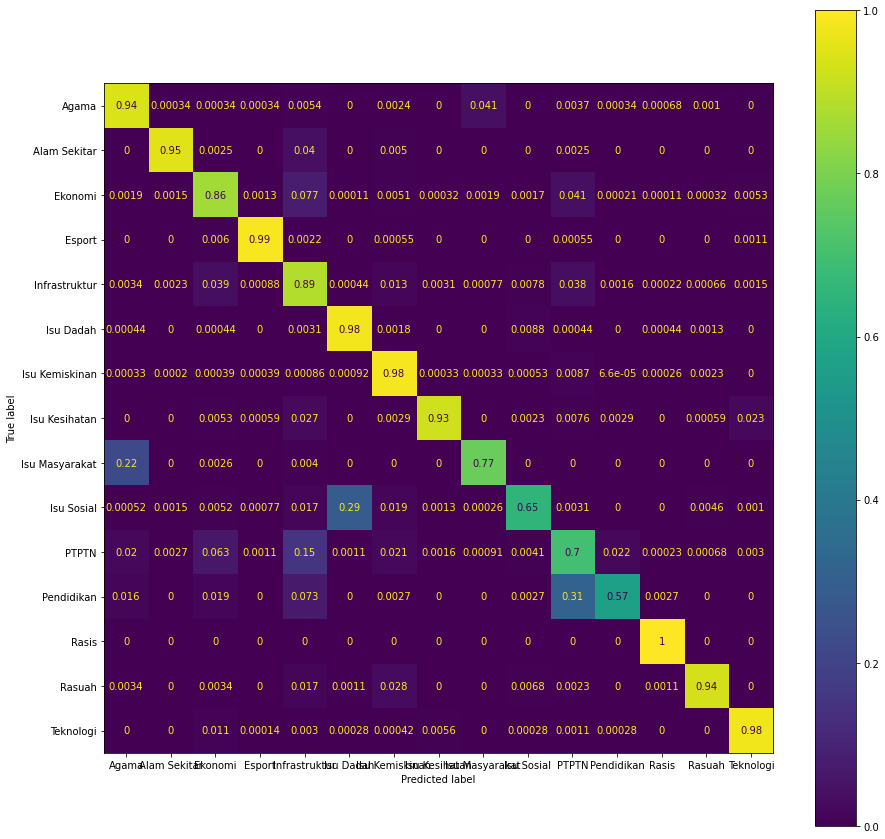

In [ ]:
fig2 = plt.figure(figsize=(15, 15))
# Create an axes instance
ax = fig2.add_subplot(111)
plot_confusion_matrix(svm_classifier, X_test, y_test,ax=ax, normalize = 'true')  

plt.show()  

# Save and Load model

In [ ]:
filename = 'svm_classifier.sav'
pickle.dump(svm_classifier, open(filename, 'wb'))

In [ ]:
filename = 'logistic_classifier.sav'
pickle.dump(logistic_classifier, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8964762094365917


In [ ]:
t = ['''RATA-RATA orang ramai agak keliru dengan penggunaan insulin kerana dikatakan boleh merosakkan buah pinggang.


Adakah benar keadaan sedemikian?

Sebenarnya, insulin sama sekali tidak merosakkan buah pinggang. Hal demikian kerana, insulin yang dicucuk kepada pesakit kencing manis itu adalah sama strukturnya dengan insulin yang dihasilkan oleh badan manusia sendiri.


Bagaimana ubat insulin itu boleh sama strukturnya dengan insulin yang dihasilkan dalam badan manusia?

Ubat insulin boleh sama strukturnya dengan insulin semula jadi yang dihasilkan dalam badan manusia melalui teknologi kejuruteraan genetik. Segala protein dalam badan kita dibina melalui gen dalam sel badan termasuklah insulin.

Gen yang menghasilkan insulin tersebut dikenal pasti dan dimasukkan ke dalam gen bakteria. Setelah itu, bakteria berkenaan pula mempunyai kemampuan untuk menghasilkan insulin yang sama seperti dalam badan manusia. Insulin itulah yang digunakan kepada pesakit kencing manis.

Oleh itu, tidak perlu gusar lagi apabila ramai mengatakan ia boleh merosakkan buah pinggang kerana perkara itu tidak benar sama sekali.


INSULIN sama sekali tidak merosakkan buah pinggang.
ANEKDOT


Jenis insulin yang sesuai kepada pesakit kencing manis:

Ia bergantung kepada bila dan sejauh mana kesannya terhadap paras glukos darah termasuklah:


 
1. Permulaan tindakan – Bila ia mula bertindak menurunkan paras glukosa?


 
2. Puncak tindakan – Bilakah kesannya di paras maksimum terhadap paras glukosa darah?

3. Jangka masa tindakan – Berapa lamakah tindakan keseluruhannya bertahan?

Kesan masa dan tempoh tindakan insulin adalah berbeza untuk setiap individu dan ia boleh juga bergantung kepada:

- Di manakah suntikan diberi

- Suhu

- Aktiviti fizikal

- Peredaran darah

- Jenis diabetes dan paras glukos dalam darah

- Gaya hidup

- Pemakanan

- Sama ada pesakit mempunyai masalah kesihatan yang lain atau tidak

- Kaedah insulin berinteraksi dengan ubat dan suplemen yang diambil
''']
text = processing(t)

In [ ]:
test_text = processing(t)
test_text = tfidfconverter.transform(test_text)

In [ ]:
pred_try = loaded_model.predict(test_text)
pred_try

array(['Isu Kesihatan'], dtype=object)